# Loan Application MLP model

## Data Preparation and Pre-processing

In [ ]:
import pandas as pd

In [ ]:
train_ds = pd.read_excel("Loan_Application_Truncated.xlsx")

train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [ ]:
len(train_ds)

1570

In [ ]:
train_ds.columns

Index(['ID', 'Decision', 'Selfcon_Code', 'Tier_1', 'Tier_2', 'AccoClass',
       'LoanType', 'Gender', 'Etype', 'Doc_pf', 'Marstat', 'Emp_Type_1',
       'Emp_Type_2', 'Emp_Type_3', 'Educlass_2', 'Educlass_1', 'Oriclass_1',
       'Oriclass_2', 'eom_25', 'OldEmi_d', 'BankSave_d', 'Age', 'YrsAdd',
       'YrsJob', 'DispInc', 'MarVal', 'OldEmi', 'LoanReq', 'Term', 'Dwnpay',
       'BankSave', 'CalcEmi', 'IIR', 'IAR', 'FOIR', 'LTV', 'LVR',
       'dwnp_prop_p'],
      dtype='object')

In [ ]:
# Setting up Independent and Dependent Variable

X = train_ds.iloc[:, 2:] # All variables after Decision Variable
y = train_ds.iloc[:, 1]  # Decision Variable

In [ ]:
num_inputs = X.shape[1]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

## Model Building

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Initialising the MLP
classifier = Sequential()

In [ ]:
# Input and Hidden Layer
classifier.add(Dense(input_dim=num_inputs, activation="relu", units=50))

In [ ]:
#classifier.add(Dense(activation="relu", units=60))

In [ ]:
# Output Layer
classifier.add(Dense(activation="sigmoid", units=1))

In [ ]:
# Model Summary

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1850      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling and Fitting the model
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = classifier.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 10, epochs = 100)

Epoch 1/100
126/126 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7604 - val_loss: 0.5346 - val_accuracy: 0.7866
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7954 - val_loss: 0.4908 - val_accuracy: 0.7898
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7970 - val_loss: 0.4622 - val_accuracy: 0.7994
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8081 - val_loss: 0.4446 - val_accuracy: 0.8089
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8113 - val_loss: 0.4294 - val_accuracy: 0.8089
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8193 - val_loss: 0.4170 - val_accuracy: 0.8185
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8256 - val_loss: 0.4074 - val_accuracy: 0.8248

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_valid)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

conf_mat = confusion_matrix(y_valid, y_pred)
conf_mat

array([[ 27,  36],
       [ 26, 225]])

In [ ]:
print('Accuracy: {0}%'.format(accuracy_score(y_valid, y_pred) * 100))

Accuracy: 80.2547770700637%


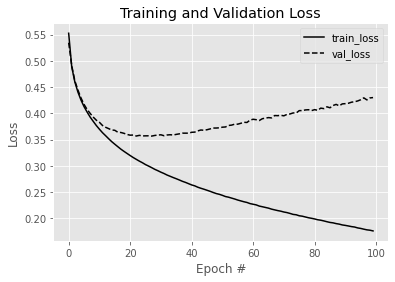

In [ ]:
# plot the training and validation loss

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(np.arange(0, 100), hist.history["loss"], label="train_loss", color='black' )
plt.plot(np.arange(0, 100), hist.history["val_loss"], label="val_loss", color='black', linestyle='--')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

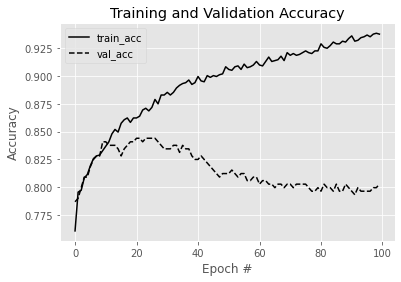

In [ ]:
# plot the training and validation accuracy

plt.style.use('ggplot')
plt.plot(np.arange(0, 100), hist.history["accuracy"], label="train_acc", color='black')
plt.plot(np.arange(0, 100), hist.history["val_accuracy"], label="val_acc", color='black', linestyle='--')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()